Ye-seul Oh.

# <span style="color:blue">11주차(1) descriptors</span>

In [15]:
import rdkit

In [16]:
from rdkit.Chem import rdMolDescriptors

In [19]:
from rdkit.Chem.rdMolDescriptors import * # rdmoldescriptors 안에 있는 모든 함수를 import 하였음. 

# Chemical descriptors defined in RDKit. 
* Molecular Descriptor: 분자의 특징을 수치로 표현한 것을 '분자 표현자'라고 한다.
* descriptor 예: 각 원소의 개수, 회전가능한 결합의 개수, 분자량 등
https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

# Descriptors related to Lipinski's rule of five
* 경구용 약이 될 수 있는 분자가 만족해야 하는 기본적인 규칙
1. CalcNumLipinskiHBA : H-bond acceptor의 개수 <=10
2. CalcNumLipinskiHBD : H-bond donor의 개수 <=5
3. CalcCrippenDescriptors : logP <=5 
4. CalcExactMolWt : 분자량 <= 500 Dalton

In [3]:
# drugs.smi 파일에 있는 분자들의 성질을 계산하는 예제들을 풀어볼 것. 
#먼저 분자들을 빈리스트에 담음.
from rdkit import Chem
molecules = []
for smi in open("drugs.smi").readlines():
    m = Chem.MolFromSmiles(smi)
    molecules.append(m)
print(len(molecules))

600


In [20]:
# Example: Hydrogen-bond acceptor의 개수를 count. 
hba_values = []
for m in molecules:
    hba = CalcNumLipinskiHBA(m) # molecule의 h-bond acceptor개수를 계산. 
    hba_values.append(hba)

In [21]:
print(hba_values)

[4, 2, 3, 2, 6, 4, 2, 7, 1, 2, 8, 3, 3, 7, 3, 3, 6, 6, 5, 4, 4, 5, 7, 4, 3, 1, 5, 9, 5, 2, 2, 2, 6, 5, 3, 3, 2, 3, 4, 2, 4, 20, 3, 7, 1, 3, 6, 4, 8, 6, 2, 3, 0, 1, 5, 3, 5, 1, 3, 3, 3, 4, 5, 5, 3, 2, 7, 3, 3, 3, 6, 3, 2, 7, 7, 4, 4, 6, 4, 3, 5, 6, 7, 5, 8, 1, 3, 6, 7, 2, 4, 7, 4, 8, 5, 3, 2, 6, 2, 5, 8, 4, 4, 18, 8, 2, 3, 4, 10, 3, 5, 7, 1, 7, 5, 5, 4, 6, 2, 4, 2, 4, 3, 3, 5, 5, 4, 12, 3, 3, 9, 8, 5, 4, 2, 3, 5, 5, 6, 5, 6, 3, 10, 2, 5, 11, 7, 6, 8, 4, 6, 5, 6, 9, 7, 5, 7, 6, 2, 5, 3, 6, 12, 9, 2, 2, 2, 11, 7, 2, 2, 12, 4, 4, 1, 4, 4, 3, 11, 4, 4, 8, 4, 8, 3, 9, 6, 9, 5, 3, 4, 6, 8, 5, 8, 8, 5, 7, 3, 1, 9, 11, 6, 5, 5, 7, 8, 5, 2, 1, 7, 4, 2, 8, 8, 2, 4, 7, 4, 3, 8, 9, 4, 8, 4, 5, 4, 2, 4, 4, 4, 4, 14, 3, 5, 3, 6, 9, 7, 4, 6, 5, 8, 6, 6, 4, 8, 7, 4, 4, 5, 9, 4, 6, 7, 4, 2, 16, 4, 4, 7, 9, 3, 5, 3, 6, 6, 1, 3, 8, 4, 10, 4, 1, 3, 12, 6, 4, 5, 2, 4, 3, 1, 6, 2, 8, 3, 5, 8, 4, 4, 7, 7, 3, 7, 4, 8, 4, 3, 4, 4, 5, 5, 9, 9, 14, 2, 9, 8, 3, 6, 4, 8, 7, 7, 2, 8, 11, 9, 5, 6, 13, 5, 4, 4, 7, 8, 

In [1]:
# Drawing histogram (histogram: 도표 - matplotlib.pyplot / plt.hist())
import matplotlib # https://matplotlib.org/gallery/index.html

If not installed, 

    !conda install -c conda-forge matplotlib -y -q 
    
    
or run the following command at the terminal.

    conda install -c conda-force matplotlib 
    


In [24]:
import matplotlib.pyplot as plt       #matplotlib.pyplot :서브 모듈(대부분의 그림 그리는 기능 들어있음)을 plt라는 이름으로 불러옴.

공식홈 : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html  
참고 교재: https://wikidocs.net/92071
* Draw the histogram of Hydrogen bond acceptor using plt.hist
* plt.hist returns frequency, bins, and plot object. 

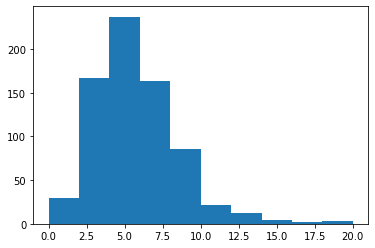

In [26]:
freq, bins, plot_obj = plt.hist(hba_values) # https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html
#총 3개가 출력되는데 1.각 구간에 해당하는 분자 갯수 2.x축 구간 3.도표
#도표 x축: H-bond acceptor 개수 , y축: 분자 개수

In [27]:
print(freq)

[ 29. 167. 237. 164.  86.  21.  12.   4.   2.   3.]


In [28]:
print(bins)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


* If one wants to change the number of bins, use bins option

(array([  2.,  27.,  74.,  93., 134., 103.,  82.,  82.,  48.,  38.,  12.,
          9.,  10.,   2.,   3.,   1.,   2.,   0.,   2.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

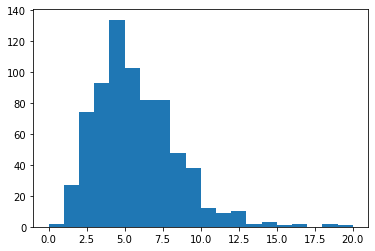

In [32]:
plt.hist(hba_values, bins=20)   #x축을 구간 개수 = 20게

Text(0.5, 0, 'Number of H-bond acceptors')

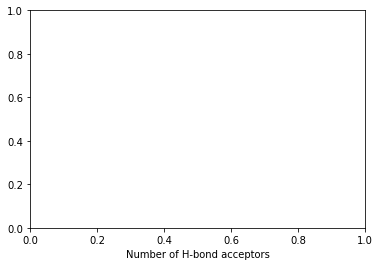

In [30]:
plt.xlabel("Number of H-bond acceptors")

Text(0, 0.5, 'Frequency')

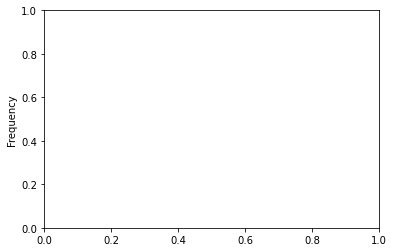

In [31]:
plt.ylabel("Frequency")

# logP의 예측값을 CalcCrippenDescriptors로 계산

In [35]:
logp_values = []
for m in molecules:
    logp, mr = CalcCrippenDescriptors(m) # 주의: return 값이 2개!
    logp_values.append(logp)

In [36]:
print(logp_values)

[3.4841000000000015, 1.0672000000000001, 1.1278, 3.9277000000000024, 4.639200000000005, 1.4658999999999998, 2.0119000000000002, -14.240600000000004, 4.358700000000004, 4.487000000000004, 1.7015999999999998, 4.111500000000003, -0.15650000000000003, 3.0702000000000016, 2.8465000000000007, 4.162600000000002, 3.1154, -2.1226, 2.3547800000000008, 3.7390000000000025, 2.1936, 1.5255000000000003, 0.6462000000000001, 1.6155000000000002, 3.5158000000000023, 2.5500000000000007, 0.7948999999999999, 2.625000000000001, 1.3424, 6.544700000000008, 4.116700000000003, 3.9277000000000024, -0.05310000000000015, 2.731700000000001, 1.771, 2.4789000000000003, 3.917520000000003, 3.812980000000003, -1.0197999999999992, 4.188600000000004, 3.4082000000000017, -4.959400000000011, 4.275500000000004, 1.6154400000000002, 1.5132, 3.4644600000000025, 2.0807, 1.7906399999999998, 2.0912200000000016, 1.4764399999999998, 3.940400000000003, 2.8580000000000005, 6.348200000000002, 3.7496000000000027, 3.8820000000000032, 1.41

# Draw histogram

(array([  4.,  40., 661.,  19.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-14.2406,  -7.2273,  -0.214 ,   6.7993,  13.8126,  20.8259,
         27.8392,  34.8525,  41.8658,  48.8791,  55.8924]),
 <BarContainer object of 10 artists>)

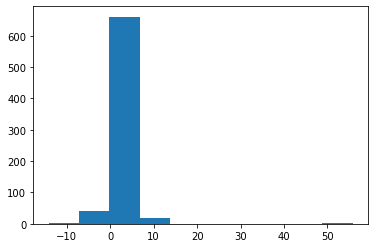

In [37]:
plt.hist(logp_values)

(array([  3.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,  10.,  28.,  97.,
        184., 206., 127.,  47.,   8.,   9.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-14.2406 , -12.83794, -11.43528, -10.03262,  -8.62996,  -7.2273 ,
         -5.82464,  -4.42198,  -3.01932,  -1.61666,  -0.214  ,   1.18866,
          2.59132,   3.99398,   5.39664,   6.7993 ,   8.20196,   9.60462,
         11.00728,  12.40994,  13.8126 ,  15.21526,  16.61792,  18.02058,
         19.42324,  20.8259 ,  22.22856,  23.63122,  25.03388,  26.43654,
         27.8392 ,  29.24186,  30.64452,  32.04718,  33.44984,  34.8525 ,
         36.25516,  37.65782,  39.06048,  40.46314,  41.8658 ,  43.26846,
         44.67112,  46.07378,  47.47644,  48.8791 ,  50.28176,  51.68442,
         53.08708,  54.48974,  55.8924 ]),
 <BarContainer object o

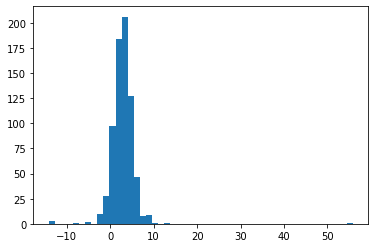

In [38]:
plt.hist(logp_values, bins = 50)

* Let's assume that logp > 50 is an outlier. (50 이상은 특이값으로 여기고 찍지말아보자)

# Histogram의 범위를 설정

(array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.,  2.,  3.,  4.,  9.,  5., 23., 25., 44., 51., 67., 69., 78.,
        72., 72., 60., 41., 27., 27., 14.,  7.,  3.,  2.,  2.,  5.,  3.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
         -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
         -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
          3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
          8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,
         12.5,  13. ,  13.5,  14. ,  14.5,  15. ]),
 <BarContainer object of 50 artists>)

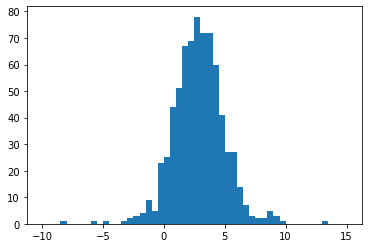

In [40]:
plt.hist(logp_values, bins=50, range=(-10, 15))

* 대부분의 약 분자들은 logP 값이 5보다 작거나 같다. 

# Hydrogen bond donor의 개수의 히스토그램

In [ ]:
hbd_values = []
for m in molecules:
    hbd = CalcNumLipinskiHBD(m)
    hbd_values.append(hbd)

In [ ]:
plt.hist(hbd_values,bins=50,range=(0,10))

# 분자량의 histogram

In [ ]:
mw_values=[]
for m in molecules:
    mw = CalcExactMolWt(m)
    mw_values.append(mw)

In [ ]:
plt.hist(mw_values,bins=100,range=(0,1000))

# <span style="color:blue">11주차(2) Matplotlib</span>

# Matplotlib 연습

* 이번 수업에서는 파이썬에서 가장 많이 사용되는 그래프 생성 툴인 matplotlib의 몇 가지 중요한 기능을 연습한다.   
공식홈 : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html  
참고 교재: https://wikidocs.net/92071

## matplotlib 설치
* 만일 matplotlib가 설치되어 있지 않다면 다음 명령으로 설치하자. 

In [1]:
!conda install matplotlib -y -q

failed

CondaError: KeyboardInterrupt



In [22]:
# (magic command) 그래프를 주피터 노트북 상에서 실시간으로 확인할 수 있다. 
%matplotlib inline 

In [23]:
# 필요한 모듈을 import 한다.
import matplotlib
import matplotlib.pyplot as plt

In [24]:
# numpy는 파이썬에서 행렬 및 연산에서 사용되는 모듈... 다음시간에 다루겠다. 
import numpy as np

In [25]:
# 데이터 준비, 등차수열을 생성한다. 
x = np.linspace(0, 10, 101) # 0에서 10까지 101개 동일 간격의 점을 생성한다.
print("Len(x):", len(x))
print("X: ", x)

Len(x): 101
X:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


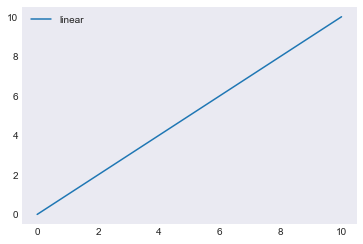

In [28]:
# Plot the data 
# 선형 그래프를 생성. 
plt.plot(x, x, label='linear')
# Add a legend (범례)
plt.legend()

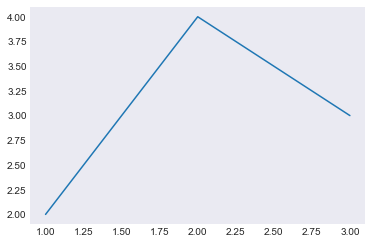

In [29]:
import matplotlib.pyplot as plt
# plt.plot("X축의 데이터 리스트, "Y축의 데이터 리스트")
plt.plot([1, 2, 3], [2, 4, 3])

plt.show()

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894   0.0168139   0.1165492   0.21511999
  0.31154136  0.40484992  0.49411335  0.57843976  0.6569866   0.72896904
  0.79366786  0.85043662  0.8987081   0.93799998  0.96791967  0.98816823
  0.99854335  0.99894134  0.98935825  0.96988981  0

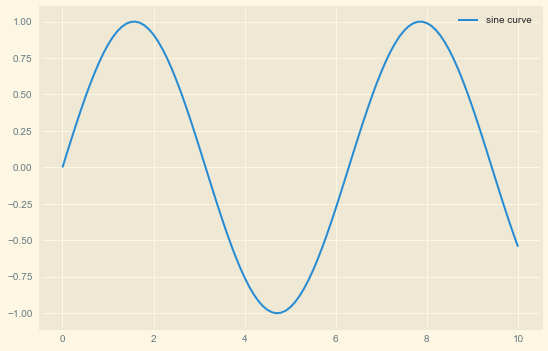

In [85]:
x=np.linspace(0, 10, 101)
plt.plot(x, np.sin(x), label="sine curve")
plt.legend()
print(np.sin(x)) # sin값을 계산한 리스트를 반환. 

In [33]:
x = [1, 2, 3]
y = [2, 4, 3]

## X, Y 축 Labeling (라벨링)

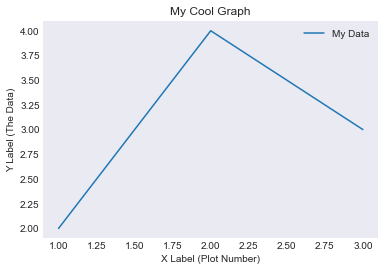

In [35]:
plt.plot(x, y, label="My Data")
plt.xlabel('X Label (Plot Number)') # X축 라벨
plt.ylabel('Y Label (The Data)')    # Y축 라벨
plt.title('My Cool Graph')          # 그래프 제목
plt.legend()

## 2개 이상의 데이터를 같이 표현할 때. 

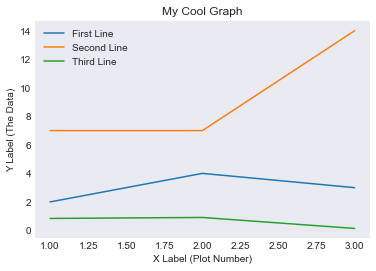

In [40]:
# First data
x = [1, 2, 3]
y = [2, 4, 3]

# Second data 
x2 = [1, 2, 3]
y2 = [7, 7, 14]
 
plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.plot(x, np.sin(x), label="Third Line")

plt.xlabel('X Label (Plot Number)')
plt.ylabel('Y Label (The Data)')
 
plt.title('My Cool Graph')
plt.legend()

### 선의 스타일을 바꿀 수 있다.
* 다음 링크를 참고 https://matplotlib.org/api/markers_api.html
* "-" : 실선
* "-." : 점이 있는 선
* "." : 점으로 이루어 진 선 등
* plot 함수에 관한 자세한 내용은 다음 reference에서 찾을 수 있다:https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

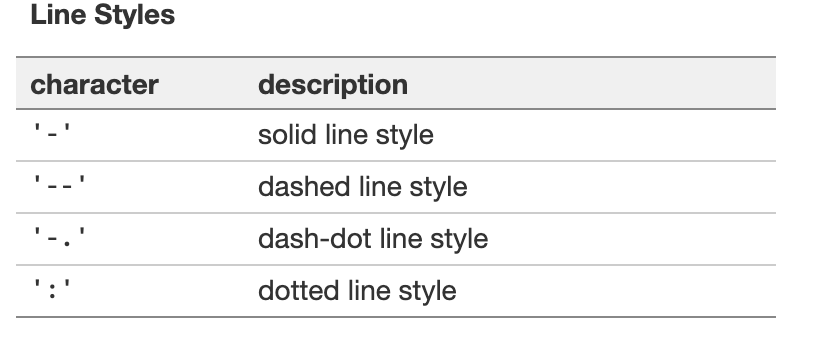

* marker (점)의 스타일도 바꿀 수 있다. 

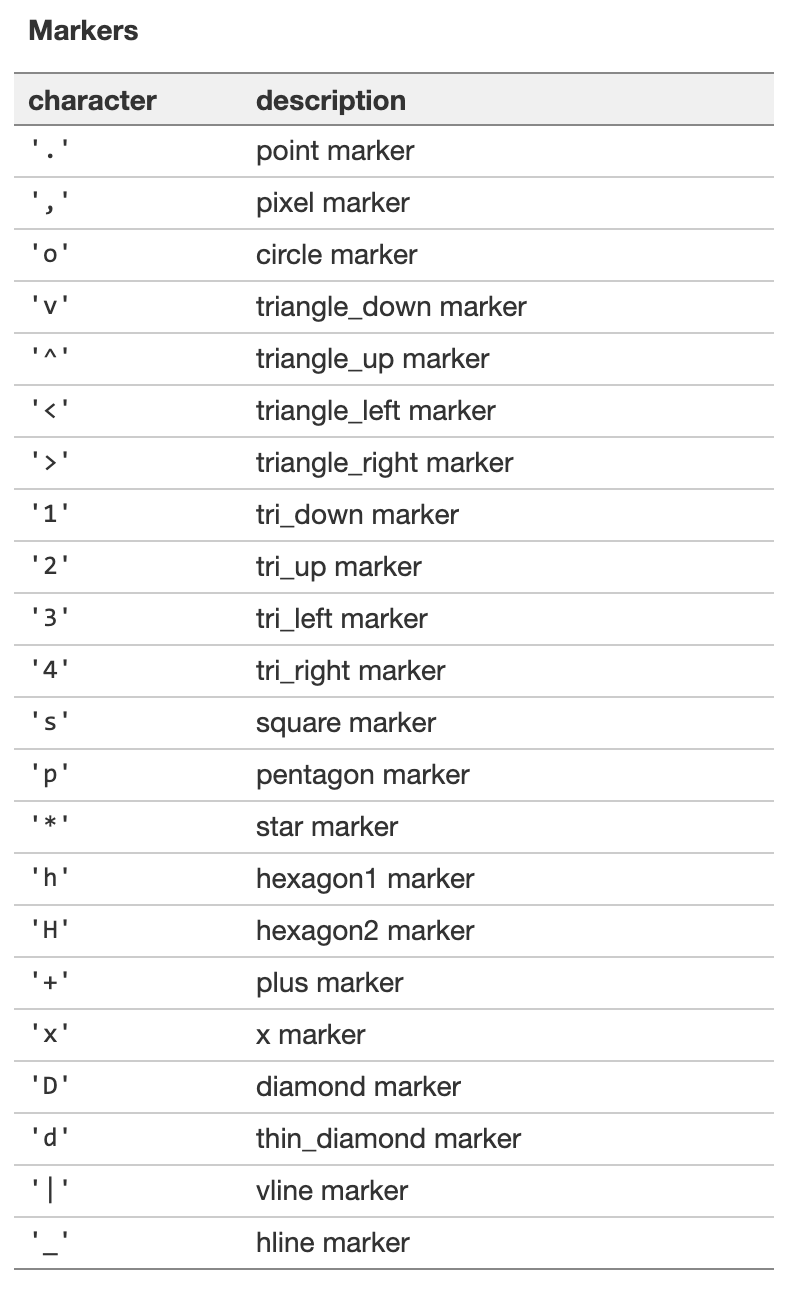

* 다음의 색을 사용할 수 있다. 

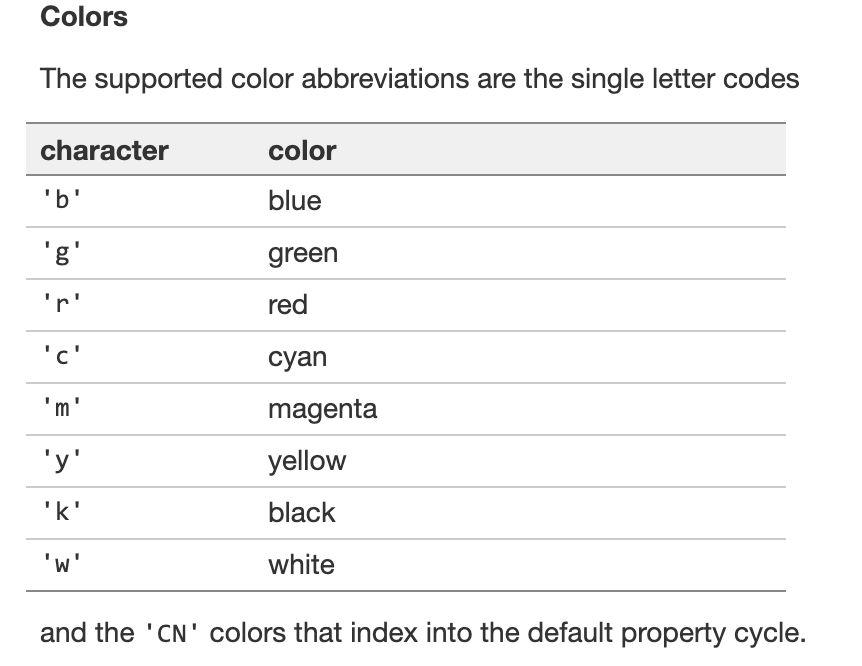


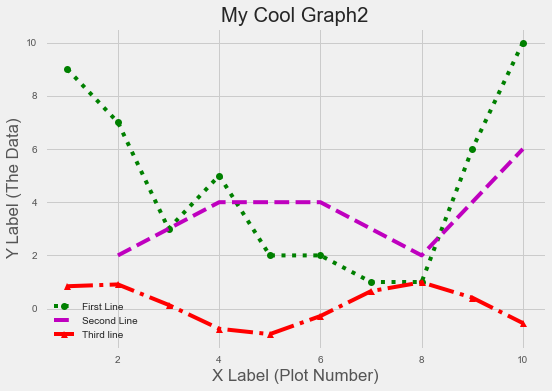

In [80]:
plt.plot(x, y, "o:g", label='First Line')
plt.plot(x2, y2, "x--m", label='Second Line')
plt.plot(x, np.sin(x), "^-.r", label="Third line")

plt.xlabel('X Label (Plot Number)')
plt.ylabel('Y Label (The Data)')
 
plt.title('My Cool Graph2')
plt.legend()
plt.show()

## Bar graph 그리기. 

```
plt.bar(x, height)
```

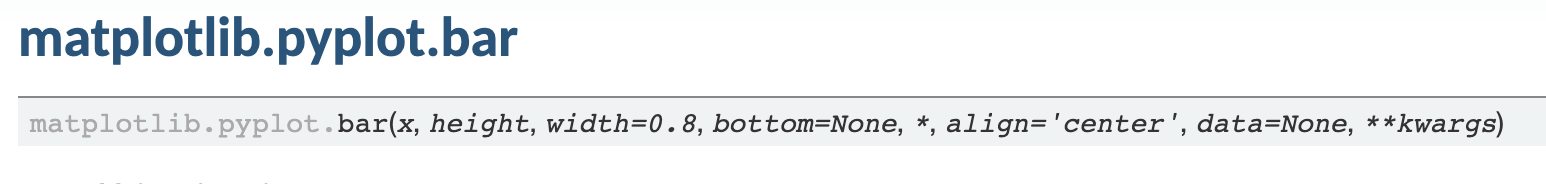

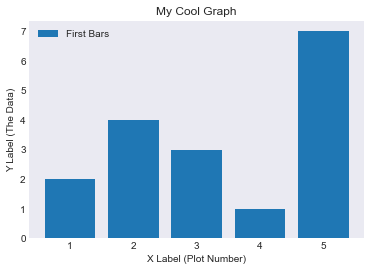

In [45]:
import matplotlib.pyplot as plt
 
x = [1, 2, 3, 4, 5] # x 축 위치
y = [2, 4, 3, 1, 7] # y 축 높이
 
plt.bar(x, y, label='First Bars')
 
plt.xlabel('X Label (Plot Number)')
plt.ylabel('Y Label (The Data)')
 
plt.title('My Cool Graph')
plt.legend()
plt.show()

## 두개 이상의 bar 그래프를 비교. 

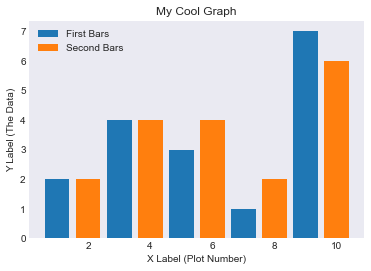

In [46]:
x = [1, 3, 5, 7, 9]
y = [2, 4, 3, 1, 7]
 
x2 = [2, 4, 6, 8, 10]
y2 = [2, 4, 4, 2, 6]
 
plt.bar(x, y, label='First Bars')
plt.bar(x2, y2, label='Second Bars')
 
plt.xlabel('X Label (Plot Number)')
plt.ylabel('Y Label (The Data)')
 
plt.title('My Cool Graph')
plt.legend()
plt.show()

## Bar graph customize.

<BarContainer object of 5 artists>

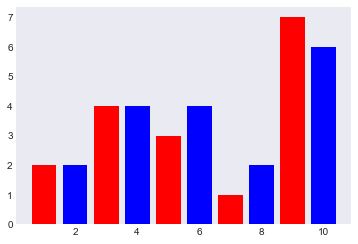

In [51]:
plt.bar(x, y, label='First Bars', color='red')
plt.bar(x2, y2, label='Second Bars', color='blue')

# Histogram 그리기 
* Histogram은 특정 범위에 해당하는 데이터의 빈도(개수)를 표시하는 그래프 

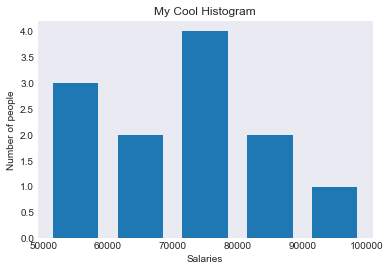

In [53]:
# Let's draw the histogram of the salaries.
salaries = [55312, 88143, 57423, 65872, 68154, 77554, 72345, 79492, 52310, 88541, 97000, 105234, 73198]
bins = [50000, 60000, 70000, 80000, 90000, 100000]

# plt.hist(데이터, 구간, 그외 추가적인 정보)
plt.hist(salaries, bins, histtype='bar', rwidth=0.7)
 
plt.xlabel('Salaries')
plt.ylabel('Number of people')
 
plt.title('My Cool Histogram')
 
plt.show()

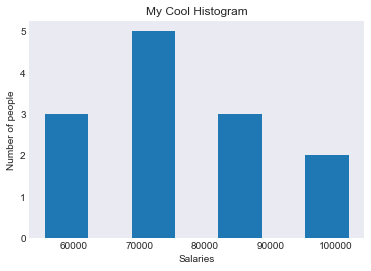

In [56]:
# Let's draw the histogram of the salaries.
salaries = [55312, 88143, 57423, 65872, 68154, 77554, 72345, 79492, 52310, 88541, 97000, 105234, 73198]
#bins = [50000, 60000, 70000, 80000, 90000, 100000]
bins = 4 # 정수를 집어넣으면 구간의 개수를 의미. 

# plt.hist(데이터, 구간, 그외 추가적인 정보)
plt.hist(salaries, bins, histtype='bar', rwidth=0.5)
 
plt.xlabel('Salaries')
plt.ylabel('Number of people')
 
plt.title('My Cool Histogram')
 
plt.show()

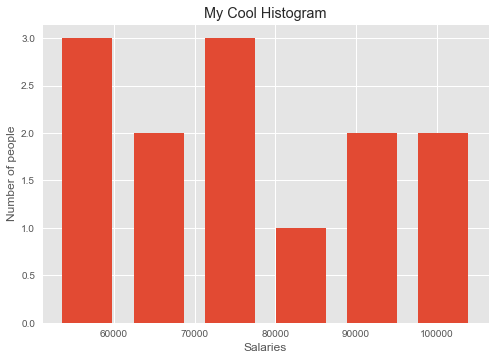

In [77]:
import matplotlib.pyplot as plt
 
salaries = [55312, 88143, 57423, 65872, 68154, 77554, 72345, 79492, 52310, 88541, 97000, 105234, 73198]
#bins = [50000, 60000, 70000, 80000, 90000, 100000]

bins=6
plt.hist(salaries, bins, histtype='bar', rwidth=0.7)
 
plt.xlabel('Salaries')
plt.ylabel('Number of people')
 
plt.title('My Cool Histogram')
 
plt.show()

# Scatter plot (분산 분포도)
* 목적: 데이터의 분포를 확인하기 위해 사용. 
* plt.plot과 다른점: 점과 점사이를 잇지 않는다. 

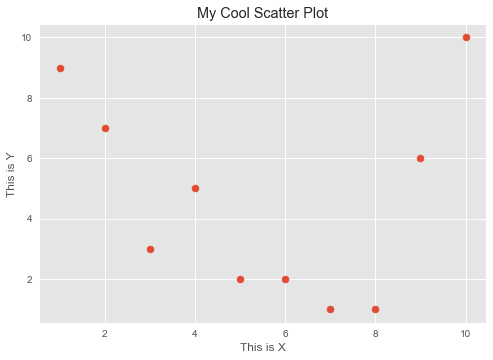

In [76]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [9, 7, 3, 5, 2, 2, 1, 1, 6, 10]
 
plt.scatter(x, y) # 분산 분포도를 그림. 
 
plt.xlabel('This is X')
plt.ylabel('This is Y')
 
plt.title('My Cool Scatter Plot')
 
plt.show()

* plt.plot과 동일하게 마커를 바꿀 수 있다!

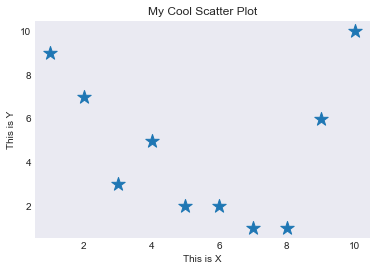

In [65]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [9, 7, 3, 5, 2, 2, 1, 1, 6, 10]
 
plt.scatter(x, y, marker='*', s=200) # marker 옵션을 이용하면 마커를 바꿀 수 있다. 점의 크기는 s= 옵션을 이용해서 바꿀 수 있다. 
 
plt.xlabel('This is X')
plt.ylabel('This is Y')
 
plt.title('My Cool Scatter Plot')
 
plt.show()

# Pie chart

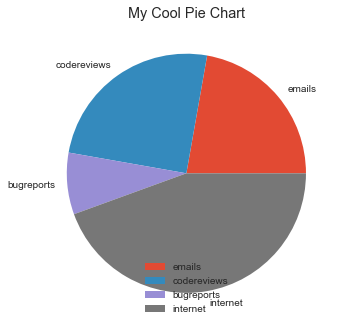

In [75]:
days = [1, 2, 3, 4, 5]
 
emails = [1, 1, 2, 3, 1]
codereviews = [2, 1, 1, 2, 3]
bugreports = [0, 0, 1, 0, 2]
internet = [3, 4, 2, 2, 5]
 
slices = [sum(emails), sum(codereviews), sum(bugreports), sum(internet)]
tasks = ['emails', 'codereviews', 'bugreports', 'internet']
 
plt.pie(slices, labels=tasks)
 
plt.title('My Cool Pie Chart')
plt.legend(loc="lower center") # loc (location의 줄임말.)
plt.show()

# Matplotlib styles
* 다양한 style을 사용할 수 있다. 
* https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
* https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
* Possible Matplotlib Styles
* One other thing to look at is customizing the styles of plots in matplotlib. Matplotlib ships with many built in styles you can use. 
* They include the styles of Solarize_Light2, _classic_test_patch, bmh, classic, dark_background, fast, fivethirtyeight, ggplot, grayscale, seaborn, seaborn-bright, seaborn-colorblind, seaborn-dark, seaborn-dark-palette, seaborn-darkgrid, seaborn-deep, seaborn-muted, seaborn-notebook, seaborn-paper, seaborn-pastel, seaborn-poster, seaborn-talk, seaborn-ticks, seaborn-white, seaborn-whitegrid, and tableau-colorblind10. Here are a few examples of how those styles look

In [81]:
# 그림의 스타일을 바꾸고 싶을 때!
plt.style.use('Solarize_Light2')

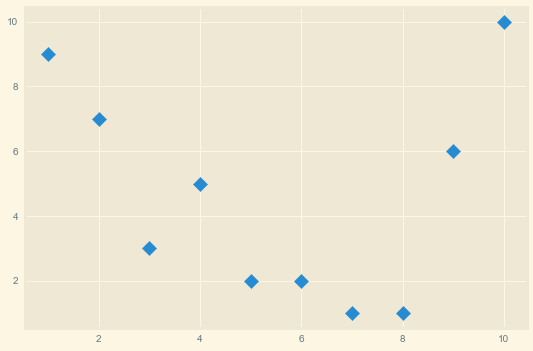

In [82]:
plt.scatter(x, y, marker='D', s=100)

## xkcd 스타일
* xkcd: https://xkcd.com/

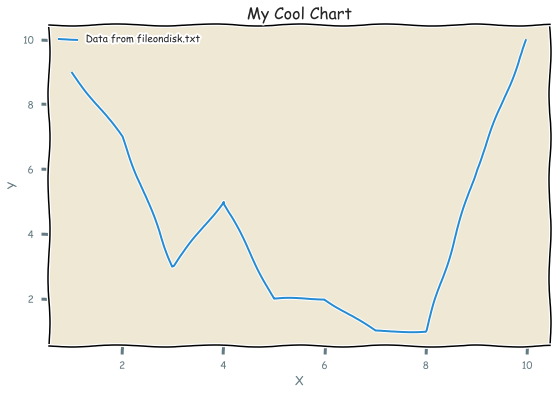

In [83]:
with plt.xkcd():
    plt.plot(x, y, label='Data from fileondisk.txt')
 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('My Cool Chart')
    plt.legend()
    plt.show()